# Questão 01

O coeficiente de saturação do oxigênio dissolvido em água fresca pode ser calculado pela equação:

$ln_{osf} = -139,34411 + \frac{1,575701*10^{5}}{T_{a}} - \frac{6,642308*10^{7}}{T^2_{a}} + \frac{1,243800*10^{10}}{T^3_{a}} - \frac{8,621949*10^{11}}{T^4_{a}}$

Onde $o_{sf}$ é a concentração de saturação do oxigênio dissolvido em água fresca a 1 atm (mg/L) e $T_{a}$ é a temperatura $(ºC).$ De acordo com essa qeuação, a saturação diminui com o aumento da temperatura. Para águas naturais típicas em climas temperados, a equação pode ser usada para determinar a variação da concentração de oxigênio de 14,621 mg/L a 0ºC até 6,413 mg/L a 40ºC.

Os seguintes dados experimentais de concentração de oxigênio dissolvido na água fresca em função da temperatura no nivel do mar são dados na tabela abaixo.

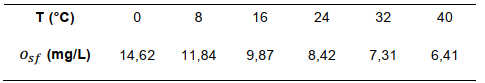

a) Para esse conjunto de dados, obtenha o polinômio interpolador que permite calcular a concentração de saturação do oxigênio em função da temperatura $T.$ Qual é  grau do polinômio ?

b) A partir dos dados da tabela, obtenha uma regressão polinomial de $3º grau$  para descrever o comportamento da concentração de saturação do oxigênio em função da temperatura $T = 10ºC.$ Compare o resultado da regressão polinomial com a função original (Equação 01)

c) Use cada abordagem para prever a concentração de oxigênio em $T = 10ºC$ e compare com a equação apresentada acima e defina, com base no erro absoluto, qual o melhor modelo 

d) Faça o gráfico de cada função, com T variando entre 0 e 40ºC.


##Bibliotecas e Funções

In [ ]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as P

In [ ]:
# Definição da Equação apresentada no Exercicio 07
def f(x): # Função retirada do Projeto 4
  return np.exp(-139.34411+((1.575701*(10**5))/x)-((6.642308*(10**7))/(x**2))+((1.243800*(10**10))/(x**3))-((8.621949*(10**11))/(x**4)))

##Forma Polinomial

In [ ]:
#LETRA A 
# Regressão Polinomial (ou Vanderval)
# Este bloco irá gerar as saidas necessarias para encontrarmos o polinomio desejado 
def sistemaVander(x,y): #a partir dos dados de x e y, vamos obter as matrizes A e B
  n = len(x) #tamanho da matriz (n também é o grau do polinomio)
  A = np.empty((n,n))
  b = np.empty((n))
  for i in range(0,n):
    A[i,0] = 1
    for j in range(1,n):
      A[i,j] = A[i,j-1]*x[i] #aplicando o metodo
    b[i] = y[i]
  return A, b

Tabela = np.array([[0,8,16,24,32,40], #dados fornecidos
                   [14.62,11.84,9.87,8.42,7.31,6.41]])
H = Tabela[0] 
L = Tabela[1]

# Dados de Saida
A,b = sistemaVander(H,L) 
Solução = np.linalg.solve(A,b)

for i in range(len(Solução)):
  print("Coeficientes "+str(i)+":",Solução[i]) # Colocando todas as casa decimais
print()
#Polinomio Total
# Bloco responsavel por escrever o polinomio de maneira automatica

print("Como temos 6 dados fornecidos, n será 5, ou seja, teremos um polinômio de 5° grau, como mostrado abaixo.")
print()
Polinomio = P(Solução)
print("Polinomio interpolador da Questão A:")
Polinomio



Coeficientes 0: 14.62
Coeficientes 1: -0.41514583333333244
Coeficientes 2: 0.009772135416666482
Coeficientes 3: -0.00018229166666665364
Coeficientes 4: 2.3396809895829562e-06
Coeficientes 5: -1.5258789062496192e-08

Como temos 6 dados fornecidos, n será 5, ou seja, teremos um polinômio de 5° grau, como mostrado abaixo.

Polinomio interpolador da Questão A:


Polynomial([ 1.46200000e+01, -4.15145833e-01,  9.77213542e-03, -1.82291667e-04,
        2.33968099e-06, -1.52587891e-08], domain=[-1,  1], window=[-1,  1])

In [ ]:
#Letra B
#Vamos usar o método da regressão polinomial, definido já na letra A
#Bloco com os dados para geração de equação do terceiro grau
#Pegando os dados de Temperatura na Tabela e deixando 3 variaveis com 4 pontos apenas (se n é 3, são necessários 4 pontos)
# Com apenas o método da regressão polinomial, como são necessários 4 pontos, e temos 6, fazer uma escolha correta de dados, também
#é essencial para um bom resultado final. Logo, vamos comparar 3 equações, feitas com 4 pontos distintos, para analisar
#qual seria a melhor escolha dentre essas 3.

primeira_equação_X =H[0:4]
segunda_equação_X = H[1:5]
terceira_equação_X = H[2:6]
#Pegando os dados de Temperatura na Tabela e deixando 3 variaveis com 4 pontos apenas
primeira_equação_Y = L[0:4]
segunda_equação_Y = L[1:5]
terceira_equação_Y = L[2:6]
#Resolvendo as matrizes pelo método já definido
A1,B1 = sistemaVander(primeira_equação_X,primeira_equação_Y)
A2,B2 = sistemaVander(segunda_equação_X,segunda_equação_Y)
A3,B3 = sistemaVander(terceira_equação_X,terceira_equação_Y)
resultado_1 = np.linalg.solve(A1,B1) #coletando resultados 
resultado_2 = np.linalg.solve(A2,B2)
resultado_3 = np.linalg.solve(A3,B3)
#Resultado
resultado_1 = P(resultado_1)
resultado_2 = P(resultado_2)
resultado_3 = P(resultado_3)
todos_os_resultados = np.array([resultado_1(10),resultado_2(10),resultado_3(10)])
todos_os_resultados = todos_os_resultados.reshape(3,1)
# ERRO ABSOLUTO
validacao1 = np.abs(resultado_1(10) - f(10+273.15))
validacao2 = np.abs(resultado_2(10) - f(10+273.15))
validacao3 = np.abs(resultado_3(10) - f(10+273.15))

# Tabelas de Dados com os Pandas
novo = pd.DataFrame([resultado_1,resultado_2,resultado_3])
novo = novo.rename(columns={0:'x^0',1:'x^1',2:'x^2',3:'x^3'})
novo = novo.rename(index={0:"Equação 01",1:"Equação 02",2:"Equação 03"})
novo.insert(4,"Resultado (10)",todos_os_resultados,True)
comparacao = [validacao1,validacao2,validacao3]
novo['Comparação'] = comparacao
novo


#Observa-se que a melhor equação e os melhores pontos, de acordo com a função de base e com a
#coluna de 'comparação', foi a equação 2, por resultar em uma diferença de valor, para 10°C, menor.

,x^0,x^1,x^2,x^3,Resultado (10),Comparação
Equação 01,14.62,-0.410208,0.008594,-0.000094,11.282891,0.005057
Equação 02,14.51,-0.385000,0.006875,-0.000059,11.288906,0.000959
Equação 03,14.31,-0.357917,0.005703,-0.000042,11.258828,0.029119


In [ ]:
#Polinomio da Equação 01
resultado_1


Polynomial([ 1.46200000e+01, -4.10208333e-01,  8.59375000e-03, -9.44010417e-05], domain=[-1,  1], window=[-1,  1])

In [ ]:
#Polinomio da Equação 02
resultado_2

Polynomial([ 1.451000e+01, -3.850000e-01,  6.875000e-03, -5.859375e-05], domain=[-1,  1], window=[-1,  1])

In [ ]:
#Polinomioda Equação 03
resultado_3

Polynomial([ 1.43100000e+01, -3.57916667e-01,  5.70312500e-03, -4.23177083e-05], domain=[-1,  1], window=[-1,  1])

In [ ]:
#LETRA C
#METODO DE REGRESSAO POLINOMIAL
Tabela = np.array([[0,8,16,24,32,40],
                   [14.62,11.84,9.87,8.42,7.31,6.41]])
X = Tabela[0] #coletando os dados em x
Y = Tabela[1] #coletando os dados em y

A,b = sistemaVander(X,Y) 
Solução = np.linalg.solve(A,b) #resolvendo

Polinomio = P(Solução)
regressao = Polinomio(10)
erro_regressao = np.abs(regressao - f(10+273.15)) #definindo o erro da regressao

# MÉTODO DE LAGRANGE
# Resposta deste bloco esta por via grafica, necessario pensar em retirar os coeficentes do codigo
def Lagrange(xp,x,y,x_grau):
  yp = 0 
  for k in range(0,x_grau+1):
    p = 1
    for j in range(0,x_grau+1):
      if k!=j:
        p = p*(xp - x[j])/(x[k]-x[j]) #aplicando o método em si
    yp = yp + p * y[k] #acumulando as variaveis
  return yp #resultado final

Tabela = np.array([[0,8,16,24,32,40],
                   [14.62,11.84,9.87,8.42,7.31,6.41]])
x = Tabela[0] 
y = Tabela[1]

x_grau = 2 #grau do polinomio
xp = 10 #valor de temperatura (eixo x) inicial 



yp = Lagrange(xp,x,y,x_grau)
print(yp)
erro_lagrange = np.abs(yp - f(10+273.15)) #erro para lagrange
t = np.arange(0,50)
yt = []
for i in t:
  yt.append(Lagrange(i,x,y,x_grau))

erro_funcao = (f(10+273.15) - f(10+273.15)) #erro para a funcao original (deve ser 0, pois ela nao apresenta diferenças)
data = {'Resultado Final': [yp,regressao,f(10+273.15)],
        'Erro absoluto': [erro_regressao,erro_lagrange,erro_funcao]}
#distribuindo os resultados em uma tabela
tabela = pd.DataFrame(data)
tabela = tabela.rename(index={0:'Lagrange',1:'Regressão',2:'Função Original'})
tabela

# Como os resultados são muito iguais, o erro absoluto, para esta temperatura, através do metodo Lagrange e Regressão Polinomial
# é igual para ambos. Logo, nesta temperatura, ambos métodos são eficientes.

11.271562499999998


,Resultado Final,Erro absoluto
Lagrange,11.271562,0.002613
Regressão,11.285334,0.016385
Função Original,11.287947,0.000000


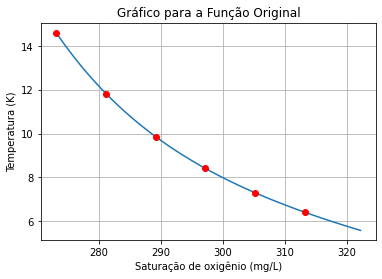

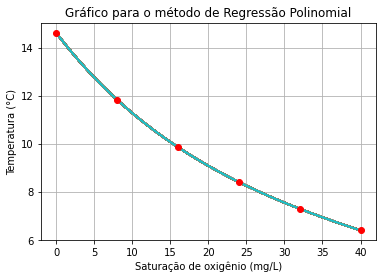

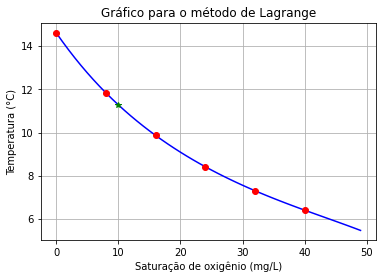

In [ ]:
#LETRA D 

#Gráfico para a função original
eixox = np.arange(273.15,(50+273.15))
plt.plot(eixox,(f(eixox)))
dados = (x+273.15)
plt.plot(dados,y,'ro')
plt.title("Gráfico para a Função Original")
plt.xlabel("Saturação de oxigênio (mg/L)")
plt.ylabel("Temperatura (K)")
plt.grid()
plt.show()
#Gráfico para a função do método de Regressão Polinomial
print()
u = np.linspace(0,40,100)
for i in range(100):ax = plt.plot(u,Polinomio(u),lw=2) # Uma coisa interessante trocando grau_3 para polinomio todos os pontos são conectados

# plt.legend(loc="upper left")
plt.plot(H,L,'ro')
# plt.subplot(x,y)
plt.title("Gráfico para o método de Regressão Polinomial")
plt.xlabel("Saturação de oxigênio (mg/L)")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.show()
print()
#Gráfico para a função do método de Lagrange
plt.plot(t,yt,'b-')
plt.plot(x,y,'ro')
plt.plot(xp,yp,'g*')
plt.title("Gráfico para o método de Lagrange")
plt.xlabel("Saturação de oxigênio (mg/L)")
plt.ylabel("Temperatura (°C)")
plt.grid()
plt.show()
# print()
